In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [ ]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [ ]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None ,dtype = np.float32)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [ ]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'drive/My Drive/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [ ]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [ ]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import GRU

In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [ ]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
y = pd.read_csv('drive/My Drive/HAR/UCI_HAR_Dataset/train/y_train.txt', delim_whitespace=True, header=None, names = ["labels"])
y


,labels
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


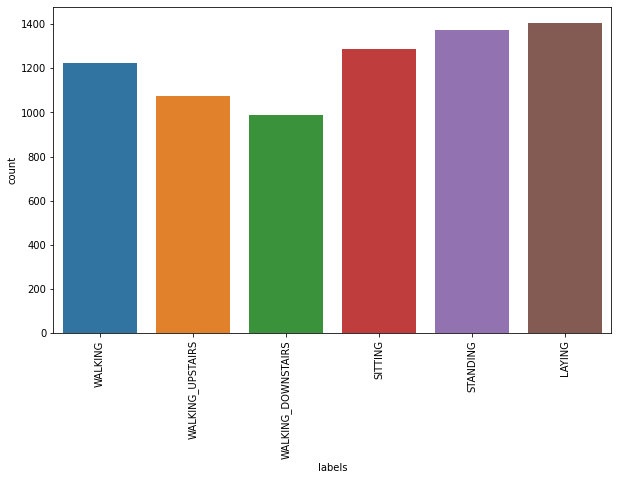

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'labels' , data = y)
ax.set_xticks(range(6))
ax.set_xticklabels(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], rotation = 'vertical')
plt.show()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [ ]:
df = pd.read_csv('drive/My Drive/HAR/UCI_HAR_Dataset/hehe.txt', header = None).values
df.shape

(1, 1161)

In [ ]:
x_temp = []
x_temp = pd.read_csv(f'drive/My Drive/HAR/UCI_HAR_Dataset/hehe.txt', header = None).values
x_temp = np.array(x_temp)
normalize.fit_transform(x_temp)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
normalize = StandardScaler()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


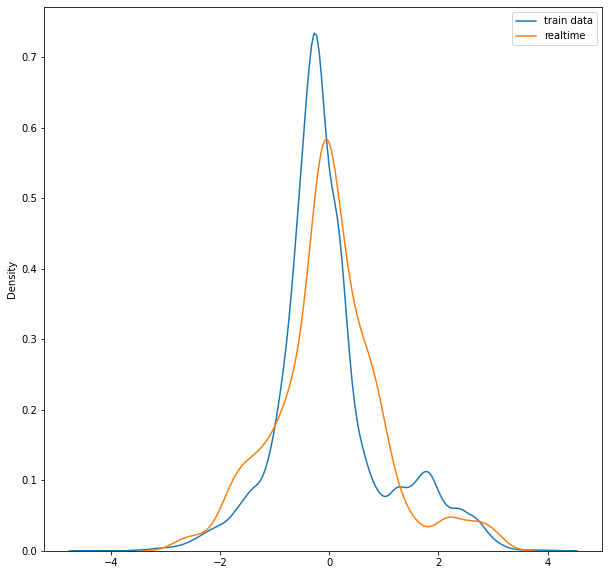

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(normalize.fit_transform(X_train[78:124].reshape(-1,1)), hist = False, label ="train data")
sns.distplot(normalize.fit_transform(x_temp.reshape(-1,1)), hist = False, label= "realtime")
plt.legend()
plt.show()

In [ ]:
print(pd.DataFrame(X_train[0]))

            0         1         2  ...         6         7         8
0    0.000181  0.010767  0.055561  ...  1.012817 -0.123217  0.102934
1    0.010139  0.006579  0.055125  ...  1.022833 -0.126876  0.105687
2    0.009276  0.008929  0.048405  ...  1.022028 -0.124004  0.102103
3    0.005066  0.007489  0.049775  ...  1.017877 -0.124928  0.106553
4    0.010810  0.006141  0.043013  ...  1.023680 -0.125767  0.102813
..        ...       ...       ...  ...       ...       ...       ...
123  0.000228 -0.002929 -0.003412  ...  1.019815 -0.127010  0.094843
124 -0.000300 -0.002023  0.000359  ...  1.019290 -0.126185  0.098350
125 -0.001147  0.000171  0.002648  ...  1.018445 -0.124070  0.100385
126 -0.000222  0.001574  0.002381  ...  1.019372 -0.122745  0.099874
127  0.001576  0.003070 -0.002270  ...  1.021171 -0.121326  0.094987

[128 rows x 9 columns]


- Defining the Architecture of GRU

In [32]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(GRU(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True))
#Adding Dropout Layer
model.add(Dropout(0.5))

model.add(GRU(16,dropout = 0.5))

model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 128, 32)           4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
gru_7 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total params: 6,630
Trainable params: 6,630
Non-trainable params: 0
_________________________________________________________________


In [33]:

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs, verbose =1)

Epoch 1/30
460/460 [==============================] - 10s 15ms/step - loss: 1.5313 - accuracy: 0.3621 - val_loss: 1.1752 - val_accuracy: 0.5168
Epoch 2/30
460/460 [==============================] - 6s 13ms/step - loss: 1.0229 - accuracy: 0.5550 - val_loss: 0.7571 - val_accuracy: 0.6227
Epoch 3/30
460/460 [==============================] - 6s 13ms/step - loss: 0.7212 - accuracy: 0.6640 - val_loss: 0.5318 - val_accuracy: 0.8134
Epoch 4/30
460/460 [==============================] - 6s 13ms/step - loss: 0.4859 - accuracy: 0.8285 - val_loss: 0.3614 - val_accuracy: 0.8768
Epoch 5/30
460/460 [==============================] - 6s 14ms/step - loss: 0.3257 - accuracy: 0.9039 - val_loss: 0.3864 - val_accuracy: 0.8775
Epoch 6/30
460/460 [==============================] - 6s 13ms/step - loss: 0.2953 - accuracy: 0.9039 - val_loss: 0.3140 - val_accuracy: 0.8921
Epoch 7/30
460/460 [==============================] - 6s 14ms/step - loss: 0.2359 - accuracy: 0.9225 - val_loss: 0.2679 - val_accuracy: 0.905

In [35]:
# Confusion Matrix
confusion_matrix(Y_test, model.predict(X_test))

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,510,0,0,0,0,27
SITTING,0,374,114,0,1,2
STANDING,0,58,474,0,0,0
WALKING,0,0,0,470,17,9
WALKING_DOWNSTAIRS,0,2,1,6,411,0
WALKING_UPSTAIRS,0,0,0,24,4,443


In [36]:
score = model.evaluate(X_test, Y_test)

93/93 [==============================] - 1s 6ms/step - loss: 0.3888 - accuracy: 0.9101


In [37]:
score

[0.38883304595947266, 0.9100780487060547]

In [38]:
import tensorflow as tf
tf.__version__
from warnings import filterwarnings
filterwarnings("ignore")
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_final.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp4j0spbom/assets


INFO:tensorflow:Assets written to: /tmp/tmp4j0spbom/assets
